In [5]:
#Import all libraries
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt

import string
import seaborn as sns
from sklearn.decomposition import PCA
from gensim.models import Word2Vec, FastText
import warnings
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')
import gensim as gsm



In [6]:
#!/usr/bin/env python
"""Wrapper for word2vec and emoji2vec models, so that we can query by entire phrase, rather than by
individual words.
"""

# External dependencies
import os.path
import gensim.models as gs
import numpy as np
from underthesea import word_tokenize
import string

class Word2VecCustom:
    def __init__(self, dim, w2v, e2v=None):
        self.wordVecModel = w2v
        self.emojiVecModel = e2v if e2v is not None else dict()
        self.dimension = dim

    @classmethod
    def from_word2vec_paths(cls, dim, w2v_path):
        w2v = gs.Word2Vec.load(w2v_path)
        return cls(dim, w2v)

    def __getitem__(self, item):
        bang_xoa = str.maketrans('', '', string.punctuation)
        item = item.translate(bang_xoa)
        # tokens = item.split(' ')
        tokens = word_tokenize(item)
        phr_sum = np.zeros(self.dimension, np.float32)

        for token in tokens:
            print(token)
            if token in self.wordVecModel.wv:  # SỬA Ở ĐÂY
                phr_sum += self.wordVecModel.wv[token]  # SỬA Ở ĐÂY
        return phr_sum
    
    def __setitem__(self, key, value):
        self.wordVecModel.wv[key] = value  # SỬA Ở ĐÂY

In [7]:
# Định nghĩa kích thước vector (thường là 300 cho Word2Vec)
vector_dim = 300

# Đường dẫn đến các mô hình
# word2vec_path = 'word2vec_dth_format.model'
word2vec_path = 'model_sg_aug.word2vec'
emoji2vec_path = 'emoji2vec.bin'  # Nếu bạn có mô hình Emoji2Vec

phrase_vec = Word2VecCustom.from_word2vec_paths(dim=vector_dim, w2v_path=word2vec_path)


In [8]:
phrase = "giảng viên"
vector = phrase_vec[phrase]
print(vector)

giảng viên
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [9]:
train = pd.read_csv("processed_train_aug.csv").dropna()
test = pd.read_csv("processed_test_aug.csv").dropna()
val = pd.read_csv("processed_dev_aug.csv").dropna()

In [10]:
#Show dataset
train.head()

text  label
0           phòng thực hành có quá nhiều máy bị hỏng      0
1  cần biết rõ hơn nữa về cách thức vận dụng vào ...      0
2               có lúc làm bài sai nói làm hơi tự ái      0
3  có những cái dạy lan man ngoài phần thi không ...      0
4  dạy dễ hiểu tận tình đảm bảo giờ lên lớp cung ...      2

In [11]:
#Show dataset
test.head()

text  label
0                          rất dễ thương dạy dễ hiểu      2
1                 quá nhiều nội dung không cần thiết      0
2  giảng lý thuyết kỹ trước làm thực hành đánh gi...      2
3         dạy thỉnh thoảng bù lịch học không dám nói      1
4  môn học cần có một giáo án rõ ràng hoặc một tà...      0

In [12]:
#Show dataset
val.head()

text  label
0           quá chú trọng vào việc luyện kỹ năng thi      0
1                          rất nhiệt tình thân thiện      2
2  các môn học cần có ứng dụng thực tiễn hơn hiện...      0
3                       thân thiện cởi mở nhiệt tình      2
4                   quá kiệt sức nên làm thấy sợ hãi      1

In [13]:
label_name = ['Tiêu cực', 'Trung Lập', 'Tích Cực']

In [14]:
def encode_phrase2vec(text, model):
    return model[text]

In [15]:
train_val =  pd.concat([train, val])

In [16]:
train_data_text_phrase_vec = [encode_phrase2vec(text, phrase_vec) for text in train['text']]
test_data_text_phrase_vec = [encode_phrase2vec(text, phrase_vec) for text in test['text']]
val_data_text_phrase_vec = [encode_phrase2vec(text, phrase_vec) for text in val['text']]
train_val_text_phrase_vec = [encode_phrase2vec(text, phrase_vec) for text in train_val['text']]

phòng
thực hành
có
quá
nhiều
máy
bị
hỏng
cần
biết
rõ
hơn nữa
về
cách thức
vận dụng
vào
trong
từng
bài tập
có
lúc
làm
bài
sai
nói
làm
hơi
tự ái
có
những
cái
dạy
lan man
ngoài
phần
thi
không
cần thiết
dạy
dễ
hiểu
tận tình
đảm bảo
giờ
lên lớp
cung cấp
đầy đủ
kiến thức
cần
có
nhằm
giảm
thời lượng
giảng dạy
cũng
sự
thú vị
học
môn toán
một
động lực
quan trọng
giúp
nhóm
chúng
hoàn thành
tất cả
bài tập
giải đáp
thắc mắc
dạy
rất
tốt
đã
không
đảm bảo
giờ
lên
lớp
ra
bài
thi
đề cương
ôn tập
nên
chú ý
đến
việc
rõ ràng
hướng dẫn
rõ
biết
phải
học
gì
theo
ý kiến
đầu ra
tốt nghiệp
bằng cấp
theo
các
chương trình
ngoại ngữ
bằng cấp
hay
nghĩ
nên
phần
tự
lo học
tiếng
anh
tiếng
anh
tiếng
anh
phải
học
thêm
mấy
cái
mất
một
khoảng
thời gian
nên
đảm bảo
giờ
trên
lớp
sử dụng
hiệu quả
tiết
học
đảm bảo
môi trường
học tập
phù hợp
nhu cầu
cần
tỉnh táo
quá
chu đáo
nên
hay
đi
lòng vòng
vấn đề
thường xuyên
đi
trễ
vào
những
buổi
gần
cuối
cần
phương pháp
học
môn
này
thường xuyên
nghĩ
phải
đi
học
bù
được
đề cập
mục tiêu
t

In [17]:
train_data_text_phrase_vec = np.array(train_data_text_phrase_vec)
test_data_text_phrase_vec = np.array(test_data_text_phrase_vec)
val_data_text_phrase_vec = np.array(val_data_text_phrase_vec)
train_val_text_phrase_vec = np.array(train_val_text_phrase_vec)
print(train_val_text_phrase_vec.shape)

(16134, 300)


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
train_val_text_tfidf = tfidf.fit_transform(train_val['text'])
# train_data_text_tfidf = tfidf.fit_transform(train['sents'])
test_data_text_tfidf = tfidf.transform(test['text'])
val_data_text_tfidf = tfidf.transform(val['text'])

In [19]:
print(val_data_text_tfidf)

  (0, 155)	0.4164271855225304
  (0, 730)	0.30000025623966503
  (0, 761)	0.40899024138430895
  (0, 1132)	0.29860064502720735
  (0, 1235)	0.26579045164957643
  (0, 1394)	0.32340759357280163
  (0, 1590)	0.3594259700826784
  (0, 1731)	0.2812485254156837
  (0, 1743)	0.31085058447532715
  (1, 1043)	0.334286922669325
  (1, 1283)	0.34498014129040167
  (1, 1401)	0.564002999717106
  (1, 1431)	0.5921144686332156
  (1, 1633)	0.31708362902054393
  (2, 236)	0.1430508896705019
  (2, 247)	0.108443500760718
  (2, 258)	0.17689606836371646
  (2, 278)	0.14642828082718526
  (2, 392)	0.16750612554501382
  (2, 465)	0.2138547831362834
  (2, 466)	0.1786648491693599
  (2, 515)	0.19470601992582307
  (2, 566)	0.1398463685685114
  (2, 595)	0.20117765107978733
  (2, 616)	0.2110299449367495
  :	:
  (1611, 1394)	0.4235048899295437
  (1611, 1498)	0.15833838867495978
  (1611, 1552)	0.20001889009358392
  (1611, 1846)	0.21980801455700072
  (1611, 1980)	0.22275239443010944
  (1611, 1984)	0.24024328745646695
  (1612, 28)	0

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
countVector = CountVectorizer(ngram_range=(2,2))
train_val_text_count_vector = countVector.fit_transform(train_val['text'])
# train_data_text_count_vector = countVector.fit_transform(train['sents'])
test_data_text_count_vector = countVector.transform(test['text'])
val_data_text_count_vector = countVector.transform(val['text'])

In [21]:
print(val_data_text_count_vector)

  (0, 2327)	1
  (0, 13232)	1
  (0, 13657)	1
  (0, 20208)	1
  (0, 21442)	1
  (0, 27767)	1
  (0, 30338)	1
  (0, 30699)	1
  (1, 18225)	1
  (1, 22231)	1
  (1, 24625)	1
  (1, 28408)	1
  (2, 3525)	1
  (2, 4465)	1
  (2, 4695)	1
  (2, 5126)	1
  (2, 7151)	1
  (2, 8435)	1
  (2, 8493)	1
  (2, 9517)	1
  (2, 10318)	1
  (2, 10867)	1
  (2, 11044)	1
  (2, 11582)	1
  (2, 12240)	1
  :	:
  (1611, 23748)	1
  (1611, 23866)	1
  (1611, 23952)	1
  (1611, 25909)	1
  (1611, 27092)	1
  (1611, 31983)	1
  (1611, 34473)	1
  (1611, 34545)	1
  (1612, 656)	1
  (1612, 3587)	1
  (1612, 4969)	1
  (1612, 5964)	1
  (1612, 9774)	1
  (1612, 12980)	1
  (1612, 13382)	1
  (1612, 20394)	1
  (1612, 22328)	1
  (1612, 26018)	1
  (1612, 27946)	1
  (1612, 28009)	1
  (1612, 29206)	1
  (1612, 31104)	1
  (1612, 33818)	1
  (1612, 34974)	1
  (1613, 24631)	1


In [22]:
# train_data = {
#     'phrase_features': train_data_text_phrase_vec,
#     'tfidf_features': train_data_text_tfidf,
#     'bi_gram_features': train_data_text_count_vector,
#
# }
test_data = {
    'phrase_features': test_data_text_phrase_vec,
    'tfidf_features': test_data_text_tfidf,
    'bi_gram_features': test_data_text_count_vector,
 
}
val_data = {
    'phrase_features': val_data_text_phrase_vec,
    'tfidf_features': val_data_text_tfidf,
    'bi_gram_features': val_data_text_count_vector,

}
train_val_data = {
    'phrase_features': train_val_text_phrase_vec,
    'tfidf_features': train_val_text_tfidf,
    'bi_gram_features': train_val_text_count_vector,
}

In [23]:
import numpy as np
from sklearn.decomposition import PCA

# train_phrase_dense = train_data['phrase_features']  # đã ở dạng numpy
# train_tfid_dense   = train_data['tfidf_features'].toarray()  # từ csr_matrix -> numpy
# train_bi_gram_dense= train_data['bi_gram_features'].toarray()  # từ csr_matrix -> numpy
#
# X_train_concat = np.concatenate([
#     train_phrase_dense,
#     train_tfid_dense,
#     train_bi_gram_dense,
# ], axis=1)
# print("X_train_concat shape:", X_train_concat.shape)
# pca = PCA(n_components=1024)
# X_train_dense = pca.fit_transform(X_train_concat)
# print("X_train_dense shape sau PCA:", X_train_dense.shape)


train_val_phrase_dense = train_val_data['phrase_features']
train_val_tfid_dense = train_val_data['tfidf_features'].toarray()
train_val_bi_gram_dense = train_val_data['bi_gram_features'].toarray()

X_train_val_concat = np.concatenate([
    train_val_phrase_dense,
    train_val_tfid_dense,
    train_val_bi_gram_dense,
], axis=1)
print("X_train_val_concat shape:", X_train_val_concat.shape)
pca = PCA(n_components=1024)
X_train_val_dense = pca.fit_transform(X_train_val_concat)
print("X_train_val_dense shape sau PCA:", X_train_val_dense.shape)

test_phrase_dense = test_data['phrase_features']
test_tfid_dense   = test_data['tfidf_features'].toarray()
test_bi_gram_dense= test_data['bi_gram_features'].toarray()

X_test_concat = np.concatenate([
    test_phrase_dense,
    test_tfid_dense,
    test_bi_gram_dense,
], axis=1)
print("X_test_concat shape:", X_test_concat.shape)

# Áp dụng transform với PCA đã fit từ train
X_test_dense = pca.transform(X_test_concat)
print("X_test_dense shape sau PCA:", X_test_dense.shape)

# =========================
# 4) GHÉP & CHUYỂN VAL THÀNH DENSE
# =========================
val_phrase_dense = val_data['phrase_features']
val_tfid_dense   = val_data['tfidf_features'].toarray()
val_bi_gram_dense= val_data['bi_gram_features'].toarray()

X_val_concat = np.concatenate([
    val_phrase_dense,
    val_tfid_dense,
    val_bi_gram_dense,
], axis=1)
print("X_val_concat shape:", X_val_concat.shape)

X_val_dense = pca.transform(X_val_concat)
print("X_val_dense shape sau PCA:", X_val_dense.shape)


X_train_val_concat shape: (16134, 37548)
X_train_val_dense shape sau PCA: (16134, 1024)
X_test_concat shape: (4035, 37548)
X_test_dense shape sau PCA: (4035, 1024)
X_val_concat shape: (1614, 37548)
X_val_dense shape sau PCA: (1614, 1024)


In [24]:
# y_train = train['sentiments'].tolist()
y_test = test['label'].tolist()
y_val = val['label'].tolist()
y_train_val = train_val['label'].tolist()

In [25]:
print(len(y_train_val))

16134


In [35]:
from sklearn.ensemble import RandomForestClassifier
import math
RF = RandomForestClassifier(n_estimators=300, random_state=2004, n_jobs=14)
RF.fit(X_train_val_dense, y_train_val)
y_pred_RF_phrase= RF.predict(X_test_dense)
print(f'Accuracy on test set: {RF.score(X_test_dense, y_test)}')

Accuracy on test set: 0.8014869888475836


Text(0.5, 1.0, 'Confusion Matrix for Random Forest Classifier')

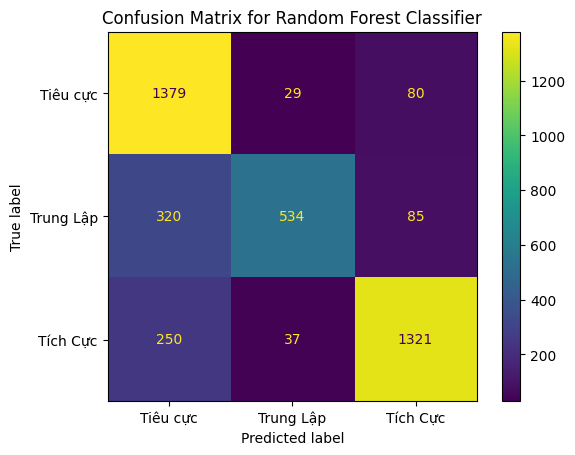

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_RF_phrase, labels=RF.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_name)
disp.plot()
plt.gca().grid(False)
plt.title("Confusion Matrix for Random Forest Classifier")

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_RF_phrase, target_names=label_name))

              precision    recall  f1-score   support

    Tiêu cực       0.71      0.93      0.80      1488
   Trung Lập       0.89      0.57      0.69       939
    Tích Cực       0.89      0.82      0.85      1608

    accuracy                           0.80      4035
   macro avg       0.83      0.77      0.78      4035
weighted avg       0.82      0.80      0.80      4035



In [39]:
from sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier(n_jobs=18, leaf_size=36, p=3)
KNC.fit(X_train_val_dense, y_train_val)
y_pred_KNN = KNC.predict(X_test_dense)
print(f'Accuracy on test set: {KNC.score(X_test_dense, y_test)}')


Accuracy on test set: 0.8223048327137547


Text(0.5, 1.0, 'Confusion Matrix for K-Nearest Neighbors Classifier')

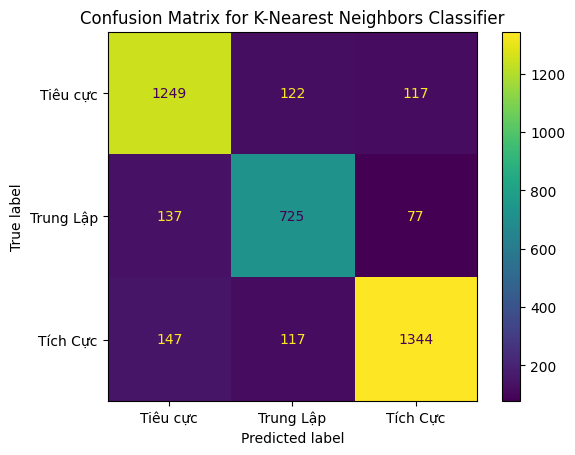

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_KNN, labels=KNC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_name)
disp.plot()
plt.gca().grid(False)
plt.title("Confusion Matrix for K-Nearest Neighbors Classifier")

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_KNN, target_names=label_name))

              precision    recall  f1-score   support

    Tiêu cực       0.81      0.84      0.83      1488
   Trung Lập       0.75      0.77      0.76       939
    Tích Cực       0.87      0.84      0.85      1608

    accuracy                           0.82      4035
   macro avg       0.81      0.82      0.81      4035
weighted avg       0.82      0.82      0.82      4035



In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
GNB = GaussianNB(var_smoothing=1e-7)
GNB.fit(X_train_val_dense, y_train_val)
y_pred_GNB = GNB.predict(X_test_dense)
print(f'Accuracy on test set: {GNB.score(X_test_dense, y_test)}')


Accuracy on test set: 0.46096654275092935


Text(0.5, 1.0, 'Confusion Matrix for Gaussian Naive Bayes')

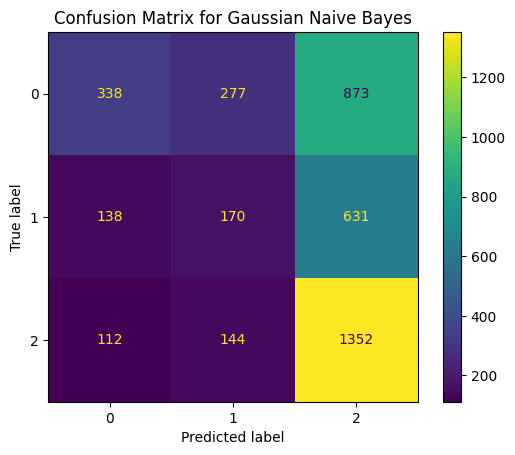

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_GNB, labels=GNB.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GNB.classes_)
disp.plot()
plt.gca().grid(False)
plt.title('Confusion Matrix for Gaussian Naive Bayes')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_GNB, target_names=label_name))

              precision    recall  f1-score   support

    Tiêu cực       0.57      0.23      0.33      1488
   Trung Lập       0.29      0.18      0.22       939
    Tích Cực       0.47      0.84      0.61      1608

    accuracy                           0.46      4035
   macro avg       0.45      0.42      0.38      4035
weighted avg       0.47      0.46      0.41      4035



Accuracy on test set: 0.7144981412639405
              precision    recall  f1-score   support

    Tiêu cực       0.67      0.79      0.72      1488
   Trung Lập       0.64      0.64      0.64       939
    Tích Cực       0.83      0.69      0.75      1608

    accuracy                           0.71      4035
   macro avg       0.71      0.71      0.71      4035
weighted avg       0.73      0.71      0.72      4035



Text(0.5, 1.0, 'Confusion Matrix for Bernouli Naive Bayes')

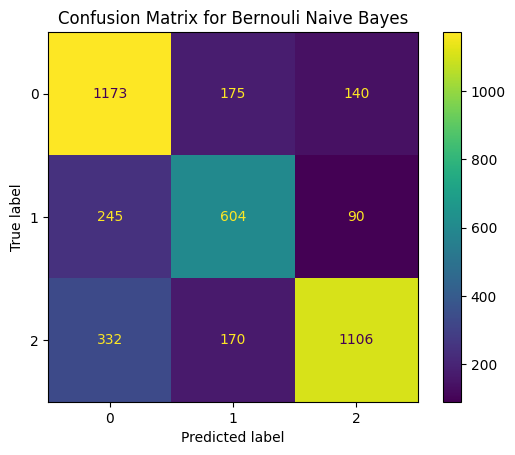

In [47]:
from sklearn.naive_bayes import  BernoulliNB
BNB = BernoulliNB()
BNB.fit(X_train_val_dense, y_train_val)
y_pred_BNB = BNB.predict(X_test_dense)
print(f'Accuracy on test set: {BNB.score(X_test_dense, y_test)}')
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_BNB, target_names=label_name))
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_BNB, labels=BNB.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=BNB.classes_)
disp.plot()
plt.gca().grid(False)
plt.title('Confusion Matrix for Bernouli Naive Bayes')

In [ ]:
!pip install xgboost

In [ ]:
from sklearn.svm import SVC
# Khởi tạo mô hình với các tham số cụ thể
svc = SVC()

# Huấn luyện mô hình
svc.fit(X_train_val_dense, y_train_val)

# Dự đoán và đánh giá
y_pred_SVC = svc.predict(X_test_dense)
accuracy = svc.score(X_test_dense, y_test)
print(f'Accuracy on test set: {accuracy:.2f}')


Accuracy on test set: 0.86


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_SVC, target_names=label_name))                     

              precision    recall  f1-score   support

    Tiêu cực       0.86      0.89      0.87      1488
   Trung Lập       0.78      0.79      0.79       939
    Tích Cực       0.90      0.87      0.89      1608

    accuracy                           0.86      4035
   macro avg       0.85      0.85      0.85      4035
weighted avg       0.86      0.86      0.86      4035



Text(0.5, 1.0, 'Confusion Matrix for Support Vector Machine')

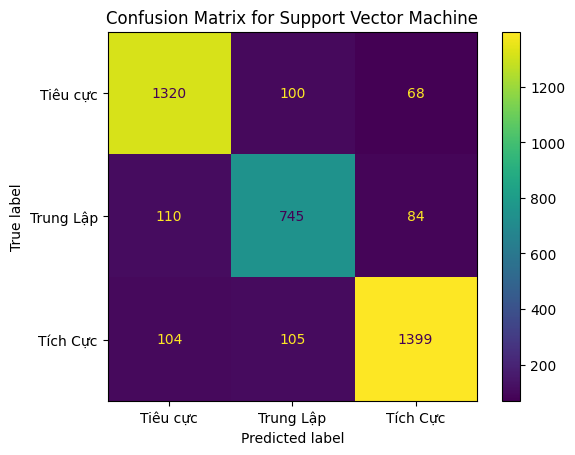

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_SVC, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_name)
disp.plot()
plt.gca().grid(False)
plt.title('Confusion Matrix for Support Vector Machine')

In [50]:
from sklearn.linear_model import SGDClassifier
sgdClassifier = SGDClassifier(max_iter=10000, tol=1e-6)
sgdClassifier.fit(X_train_val_dense, y_train_val)

y_pred_sgd = sgdClassifier.predict(X_test_dense)
accuracy = sgdClassifier.score(X_test_dense, y_test)
print(f'Accuracy on test set: {accuracy:.2f}')

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_sgd, target_names=label_name))

Accuracy on test set: 0.85
              precision    recall  f1-score   support

    Tiêu cực       0.88      0.86      0.87      1488
   Trung Lập       0.76      0.81      0.78       939
    Tích Cực       0.89      0.88      0.88      1608

    accuracy                           0.85      4035
   macro avg       0.84      0.85      0.84      4035
weighted avg       0.86      0.85      0.85      4035



Text(0.5, 1.0, 'Confusion Matrix for Linear Support Vector Machine')

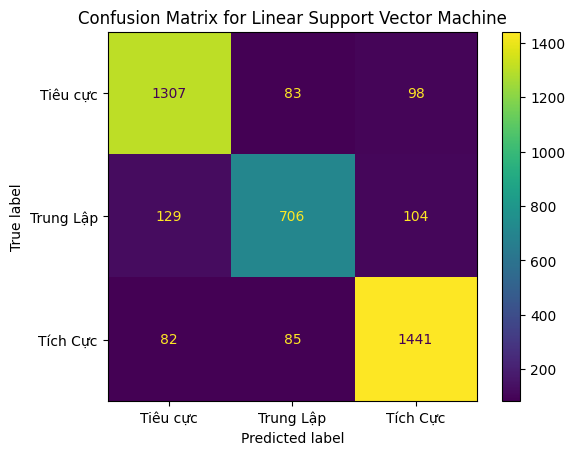

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_sgd, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_name)
disp.plot()
plt.gca().grid(False)
plt.title('Confusion Matrix for Linear Support Vector Machine')

Accuracy on test set: 0.857992565055762
              precision    recall  f1-score   support

    Tiêu cực       0.87      0.88      0.87      1488
   Trung Lập       0.79      0.78      0.78       939
    Tích Cực       0.89      0.89      0.89      1608

    accuracy                           0.86      4035
   macro avg       0.85      0.85      0.85      4035
weighted avg       0.86      0.86      0.86      4035



Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

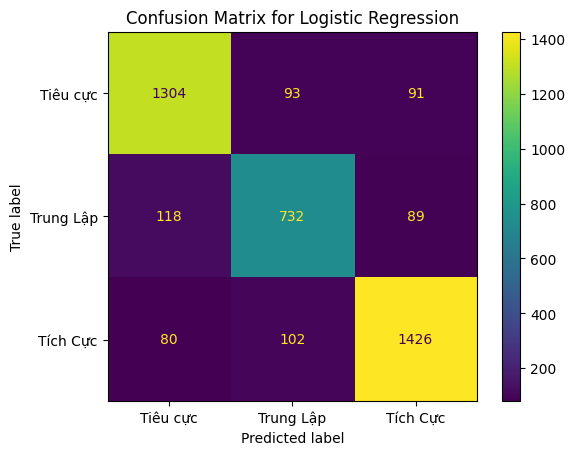

In [55]:
from sklearn.linear_model import LogisticRegression



logistic_regression = LogisticRegression(
    max_iter=100000,
    tol=1e-8,
    random_state=2004,
    warm_start=True,
    C= 1.2, n_jobs=18
)

# Huấn luyện mô hình
logistic_regression.fit(X_train_val_dense, y_train_val)

# Dự đoán
y_pred_logistic_regression = logistic_regression.predict(X_test_dense)

# Đánh giá mô hình
accuracy = logistic_regression.score(X_test_dense, y_test)
print(f'Accuracy on test set: {accuracy}')
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_logistic_regression, target_names=label_name))
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_logistic_regression, labels=logistic_regression.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_name)
disp.plot()
plt.gca().grid(False)
plt.title('Confusion Matrix for Logistic Regression')

In [67]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val_dense, y_train_val, test_size=0.2, random_state=42
)

# Define the parameter grid for tuning
param_dist = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_lambda': [0.1, 1, 10],
    'reg_alpha': [0, 0.1, 1],
    'min_child_weight': [1, 2, 3],
    'n_estimators': [200]  # Use early stopping to find optimal value
}

# Initialize the XGBoost classifier
xgb = XGBClassifier(
    objective='binary:logistic',  # Adjust for multiclass
    eval_metric='logloss',        # Use 'mlogloss' for multiclass
    early_stopping_rounds=10,
    verbosity=0
)

# Randomized search with cross-validation
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=20,
    scoring='f1',  # Use appropriate metric (e.g., 'roc_auc', 'accuracy')
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the model with early stopping
random_search.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=False
)

# Get the best parameters
best_params = random_search.best_params_
print(f"Best parameters: {best_params}")

# Train the final model on the full training data with best parameters
final_xgb = XGBClassifier(**best_params)
final_xgb.fit(
    X_train_val_dense, y_train_val,
    eval_set=[(X_val, y_val)],
    verbose=False
)

# Evaluate on the test set
y_pred_xgb = final_xgb.predict(X_test_dense)
print(classification_report(y_test, y_pred_xgb, target_names=label_name))

Fitting 3 folds for each of 20 candidates, totalling 60 fits


: 

              precision    recall  f1-score   support

    Tiêu cực       0.78      0.80      0.79      1488
   Trung Lập       0.74      0.74      0.74       939
    Tích Cực       0.85      0.83      0.84      1608

    accuracy                           0.80      4035
   macro avg       0.79      0.79      0.79      4035
weighted avg       0.80      0.80      0.80      4035



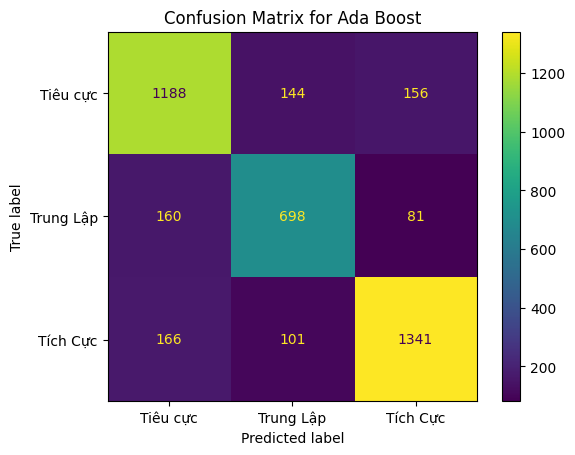

In [66]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier 
# XGB cho bài toán phân loại
ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(),
                         n_estimators=300, random_state=2004)
ada.fit(X_train_val_dense, y_train_val)
y_pred_ada = ada.predict(X_test_dense)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_ada, labels=ada.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_name)
disp.plot()
plt.gca().grid(False)
plt.title('Confusion Matrix for Ada Boost')

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_ada, target_names=label_name))